# Trumpet plot

Trumpet plots were introduced in the research article

Corte L, Liou L, O'Reilly PF, García-González J. Trumpet plots: visualizing the relationship between allele frequency and effect size in genetic association studies. *GigaByte*. 2023 Sep 1; 2023:gigabyte89. doi: https://doi.org/10.46471/gigabyte.89.

and its goal is to visualize effect size of risk variants across the allele frequency spectrum.

In [1]:
import sys
import os

import pandas as pd

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.visualization.plots import trumpet_draw
from ideal_genom.get_examples import get_trumpet_quantitative_example, get_top_loci_trumpet_quantitative, get_top_cond_trumpet_quantitative

The first example corresponds to a trumpet plot for a quantitative trait: height. We are going to use the summary statistics provided in the study:

Akiyama, M., et. al. (2019): Characterizing rare and low-frequency height-associated variants in the Japanese population. *Nature communications*, 10(1), 4393.

In [2]:
example_path = get_trumpet_quantitative_example()

INFO:ideal_genom.get_examples:File already exists: /home/luis/CGE/ideal-genom/data/sumstats/2019_BBJ_Height_autosomes_BOLT.txt


The aforementioned file is not small (more than 2 Gb) so it will be loaded in chunks and filtered, in order to get the SNPs with smallest p-values.

In [3]:
chunk_size = 2000

filtered_chunks=[]

for chunk in pd.read_csv(example_path, sep=r'\s+', engine='python', chunksize=chunk_size):
    
    filtered_chunk = chunk[chunk['P_INF'] < 5e-08].reset_index(drop=True)
    filtered_chunks.append(filtered_chunk)

df_gwas = pd.concat(filtered_chunks, ignore_index=True)

In [4]:
print("Number of SNPs in GWAS data: ", df_gwas.shape[0])
print("Columns in GWAS data: ", df_gwas.columns.to_list())

Number of SNPs in GWAS data:  65291
Columns in GWAS data:  ['Variants', 'CHR', 'POS', 'REF', 'ALT', 'ALT_freq', 'MAF', 'Rsq', 'BETA', 'SE', 'P_INF', 'P_BOLT']


We have followed the recommendation in the source article and allow for positive and negative values of `BETA`, and then we only take into account the minor allele frequency.

Although most parameters are self explanatory, it is important to emphasize some of them. Since we have a GWAS for a continuous trait, `mode` must be set to `quantitative`. In order to compute the power curves, the sample size is needed. One option is to provide it through the parameter `sample_size` or give the column in the summary statistics corresponding to the sample size of each SNP in the parameter `n_col`.

Also, notice that we have included the option of filter the summary statistics according to the p-value.

INFO:ideal_genom.visualization.plots:Filtering GWAS dataframe with p-value < 5e-10
INFO:ideal_genom.visualization.plots:Number of SNPs in filtered GWAS dataframe: 44041
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.384427)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3996 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.384427)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3995 eaf-beta combinations with power >= 0.4 an

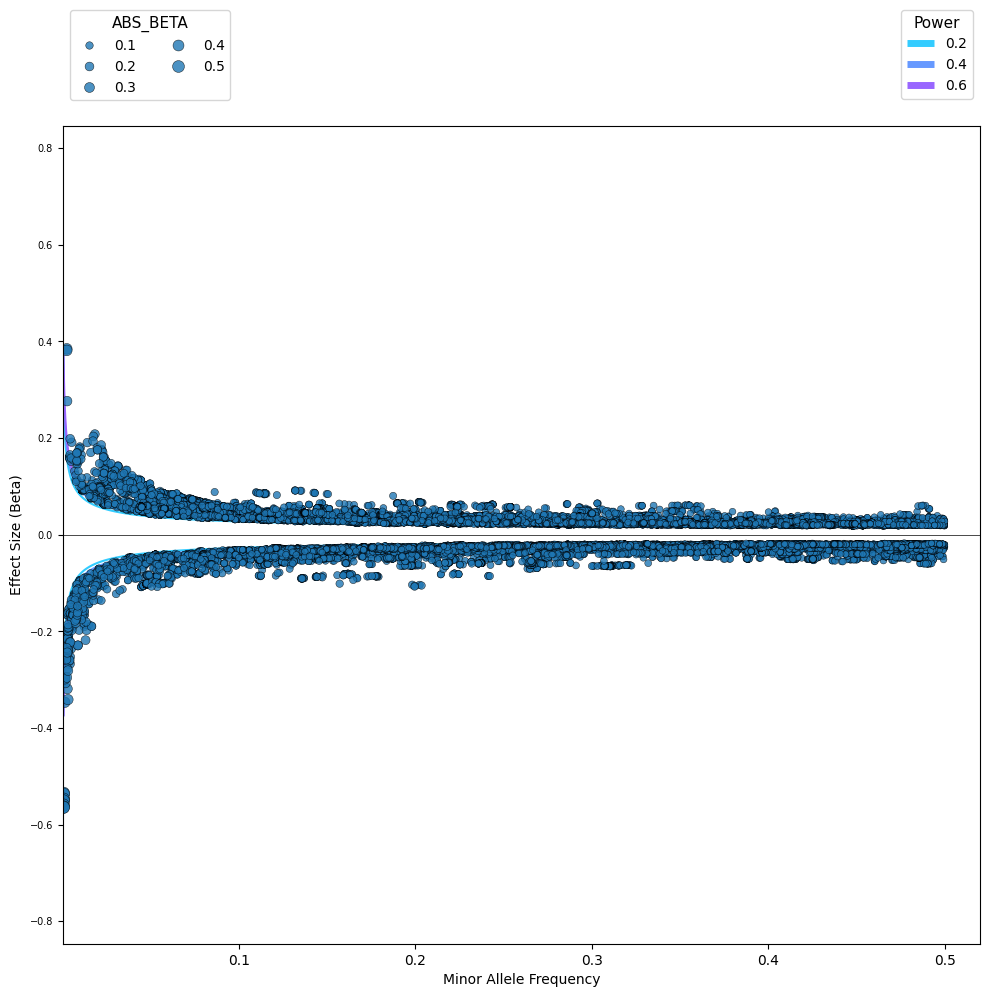

True

In [5]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.2,0.4,0.6], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_BOLT', 
    mode       ='quantitative', 
    p_filter   =5e-10,
    save_name  ='trumpet_plot.jpeg',
)

What if we want to highlight some SNPs, for example the top hits?

We only have to provide a list of the desired SNPs.

In [6]:
tophits_path = get_top_loci_trumpet_quantitative()

INFO:ideal_genom.get_examples:File already exists: /home/luis/CGE/ideal-genom/data/sumstats/2019_BBJ_Height_autosomes_BOLT_loci.csv


In [7]:
to_highlight = pd.read_csv(tophits_path, sep=r'\s+', engine='python')

INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.58436)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3998 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.58436)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3997 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF ran

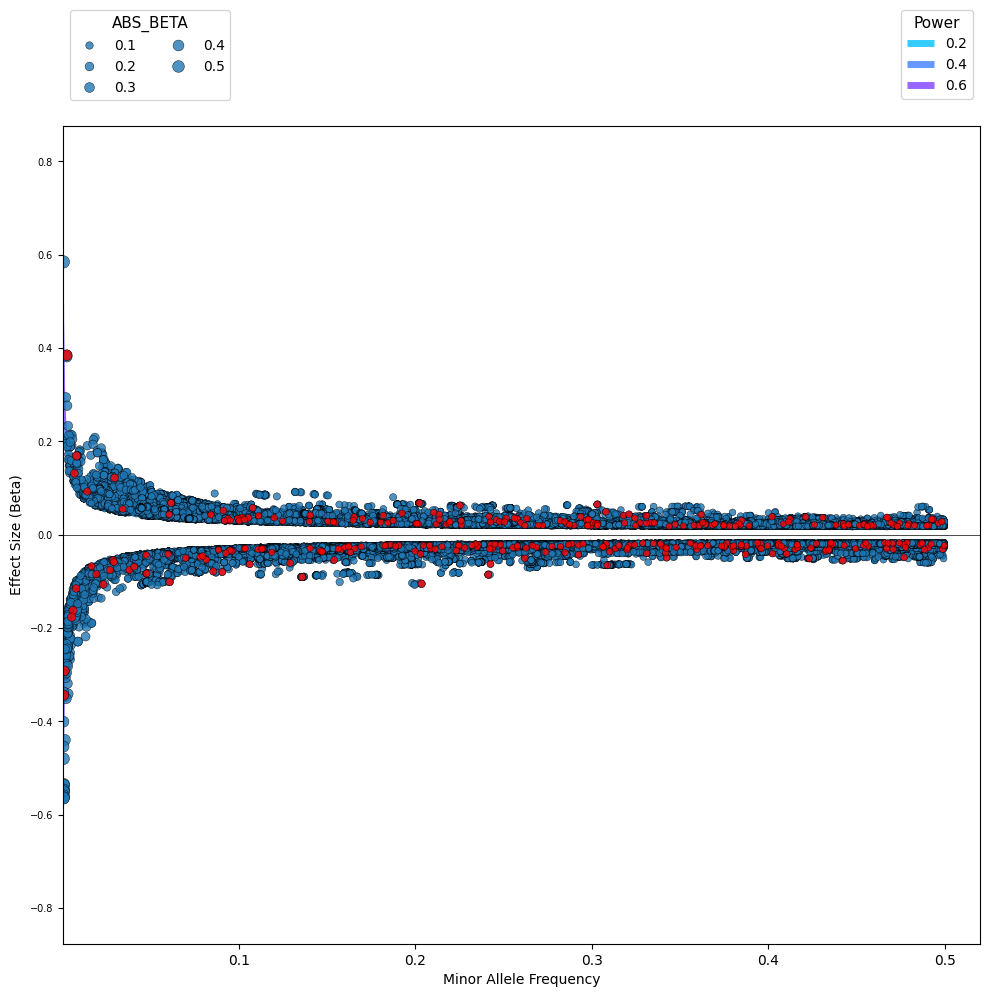

True

In [8]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.2,0.4,0.6], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_INF', 
    mode       ='quantitative', 
    p_filter   =None, 
    save_name  ='trumpet_plot_high.jpeg',
    to_highlight=to_highlight['Variants'].tolist(),
)

In case we wanted to add gene annotations, it is simple. Although, it is important to remark that annotations can overload the plot. The parameter `to_annotate` receive a data frame with the SNPs to annotate.

There are two possibilities for annotations:
1. We already have the gene annotations and they are in the data frame (in this case we must give the gene name column);
2. We only know the SNPs to annotate.

In the second case, the library automatically annotates the SNP using RefSeq or Ensembl databases. This can be specified in the parameter `source` defaulted to `ensembl`.

The example we are using has coordinates according to build 37 of the human genome, so it must be specified with the parameter `build` which has build 38 as default.

In [9]:
to_annotate = to_highlight[to_highlight['New_Locus'] == 'YES'].reset_index(drop=True)

INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.58436)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3998 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.58436)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3997 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF ran

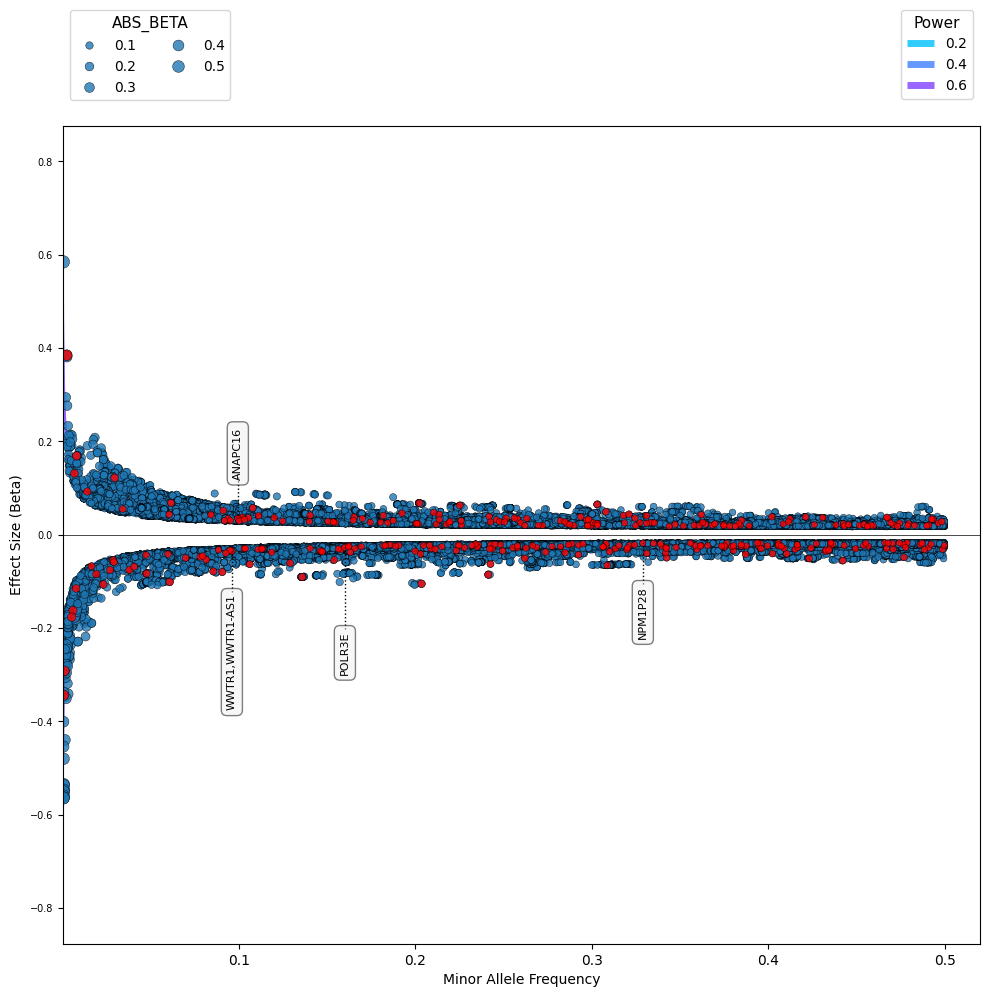

True

In [10]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.2,0.4,0.6], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_INF', 
    mode       ='quantitative', 
    p_filter   =None, 
    save_name  ='trumpet_plot_high.pdf',
    to_highlight=to_highlight['Variants'].tolist(),
    to_annotate=to_annotate,
    build      ='37',
)

Finally, we can also manipulate the scale of the x axis.

INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.58436)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08


INFO:ideal_genom.power_comp: -Found 3998 eaf-beta combinations with power >= 0.2 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.58436)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3997 eaf-beta combinations with power >= 0.4 and columns: Index(['eaf', 'beta', 'power'], dtype='object')
INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.58436)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3997 eaf-beta combinations with power >= 0.6 and columns: Index(['eaf', 'bet

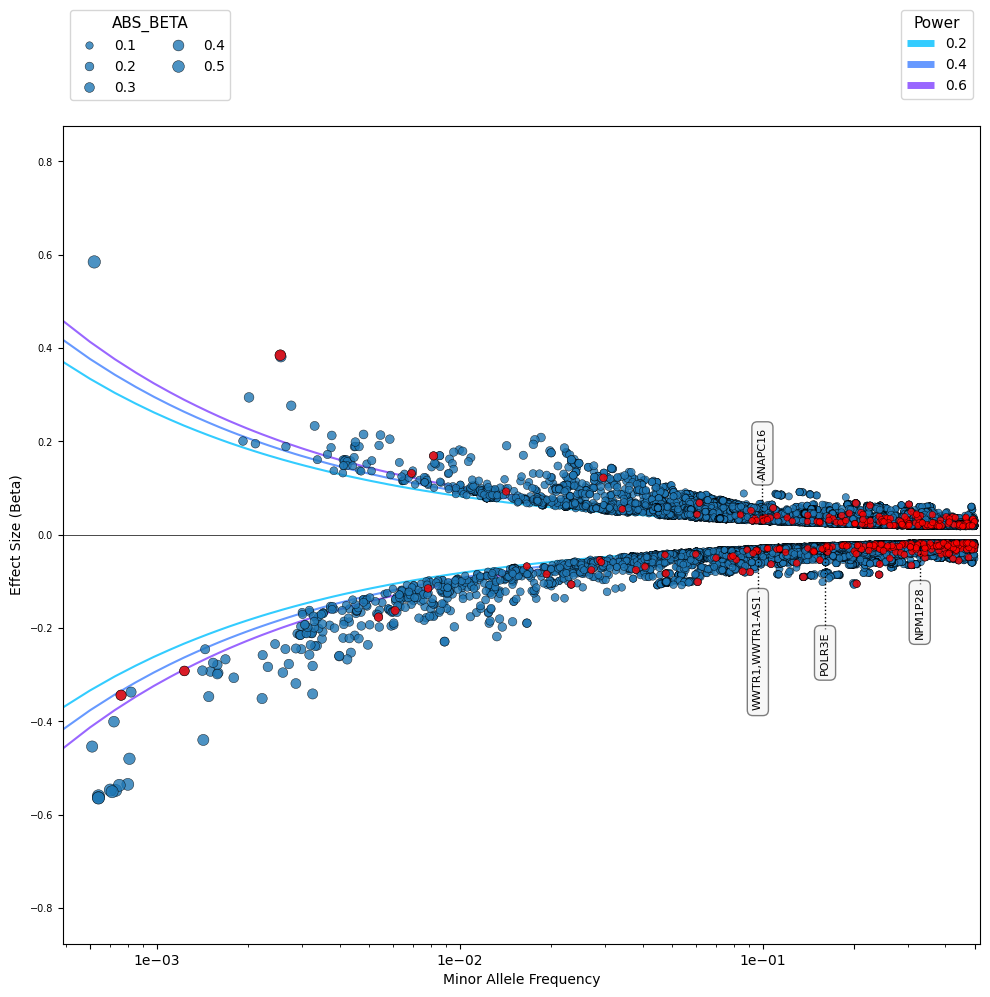

True

In [17]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.2,0.4,0.6], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_INF', 
    mode       ='quantitative', 
    p_filter   =None, 
    save_name  ='trumpet_plot_high.pdf',
    to_highlight=to_highlight['Variants'].tolist(),
    scale='log',
    to_annotate=to_annotate,
    build      ='37',
)

In this last example we could see how the logarithmic scale works better for a high number of SNPs on the plot.

In [12]:
cond_path = get_top_cond_trumpet_quantitative()

INFO:ideal_genom.get_examples:File already exists: /home/luis/CGE/ideal-genom/data/sumstats/2019_BBJ_Height_autosomes_BOLT_cond.csv


In [13]:
cond_hits = pd.read_csv(cond_path, sep=r'\s+', engine='python')

In [14]:
chunk_size = 2000

filtered_chunks=[]

for chunk in pd.read_csv(example_path, sep=r'\s+', engine='python', chunksize=chunk_size):
    
    highlight_chunk = pd.merge(chunk, to_highlight, on='Variants', how='inner')
    highlight_chunk = highlight_chunk[['CHR', 'POS', 'Variants', 'P_BOLT', 'BETA', 'MAF']].copy()

    conditional_chunk = pd.merge(chunk, cond_hits, on=['CHR', 'POS'], how='inner')
    conditional_chunk = conditional_chunk[['CHR', 'POS', 'Variants', 'P_BOLT', 'BETA', 'MAF']].copy()

    chunk_top = pd.concat([highlight_chunk, conditional_chunk], ignore_index=True, axis=0)

    filtered_chunks.append(chunk_top)

df_top = pd.concat(filtered_chunks, ignore_index=True)

The next plot is very similar to the one in the paper from the data was fetched. The main difference lies just in the scaling of the Y-axis.

INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.384427)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3993 eaf-beta combinations with power >= 0.8 and columns: Index(['eaf', 'beta', 'power'], dtype='object')


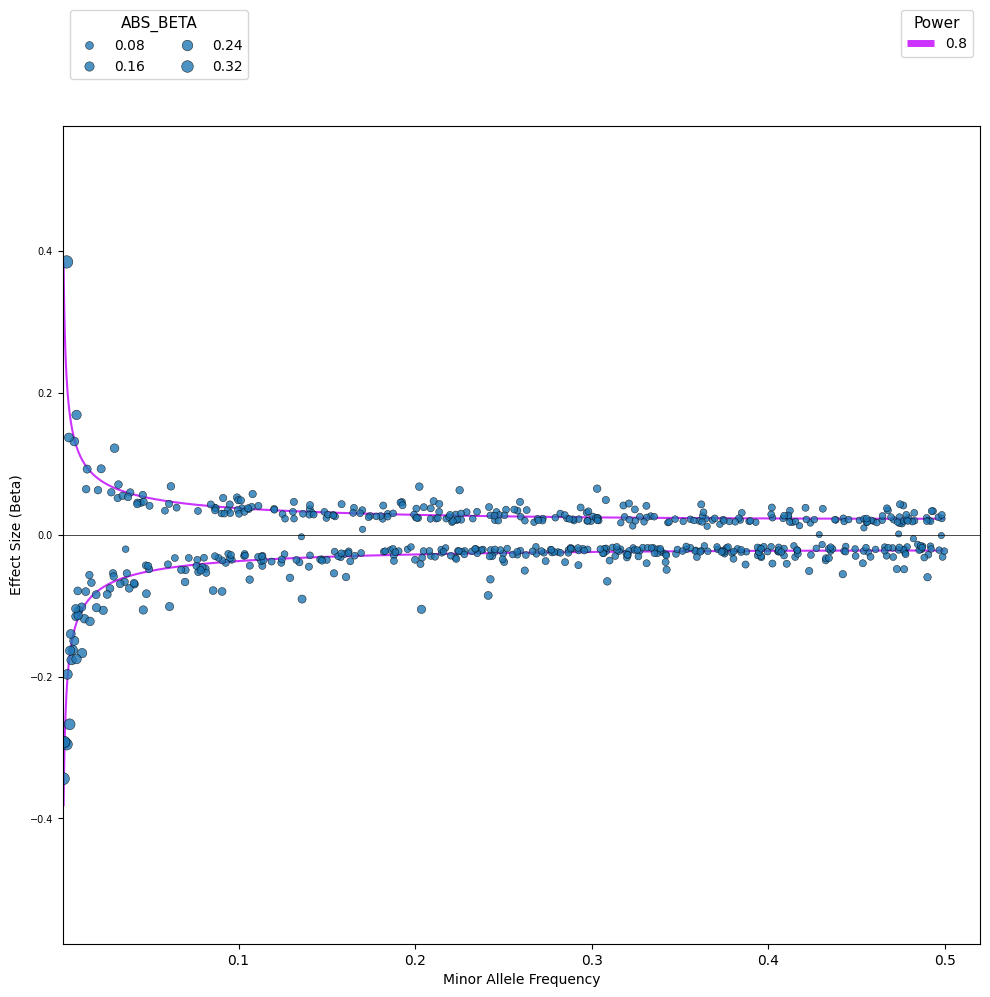

True

In [15]:
trumpet_draw(
    df_gwas    =df_top, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.8], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_BOLT', 
    mode       ='quantitative', 
    p_filter   =None, 
    save_name  ='trumpet_plot_top.pdf',
    to_highlight=[],
    scale='linear',
)

INFO:ideal_genom.power_comp: -Calculating power matrix with parameters: 
INFO:ideal_genom.power_comp:  --EAF range: (0.0001, 0.5)
INFO:ideal_genom.power_comp:  --Beta range: (0.0001, 0.384427)
INFO:ideal_genom.power_comp:  --Sample size: 159000
INFO:ideal_genom.power_comp:  --Significance level: 5e-08
INFO:ideal_genom.power_comp: -Found 3993 eaf-beta combinations with power >= 0.8 and columns: Index(['eaf', 'beta', 'power'], dtype='object')


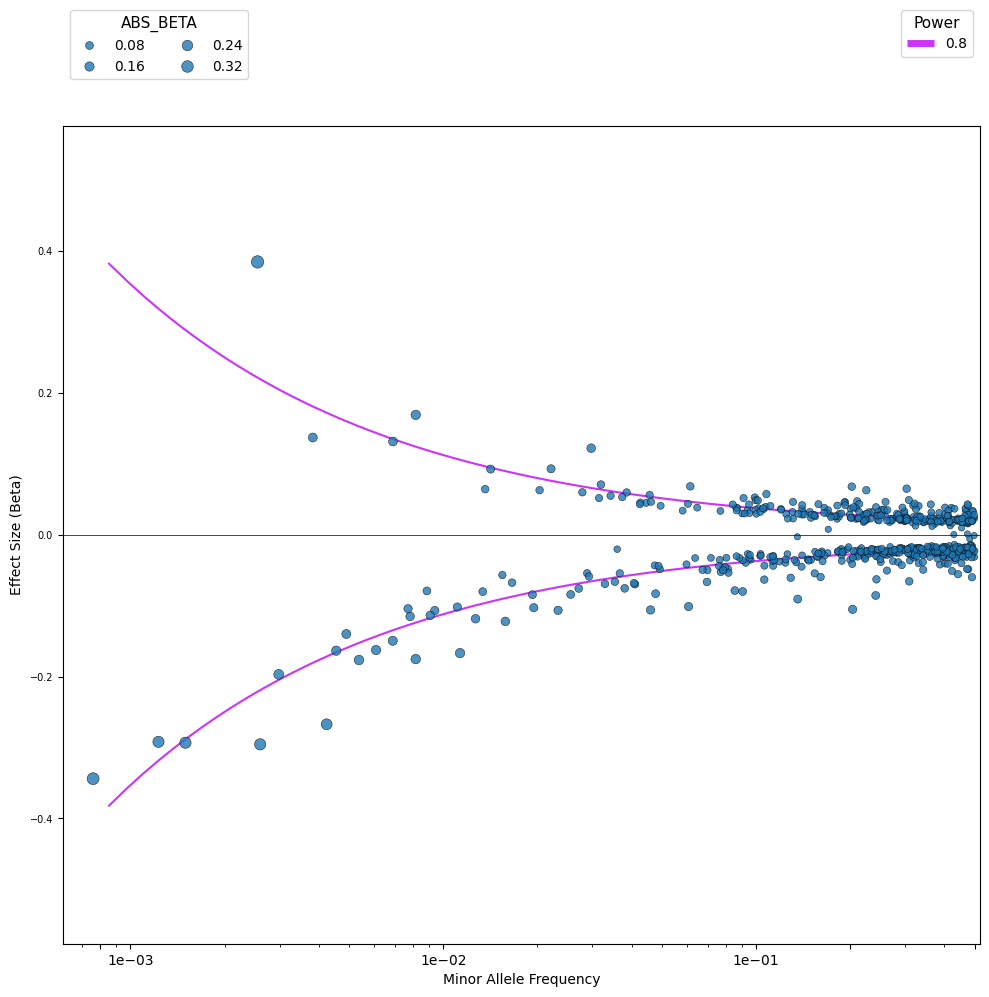

True

In [16]:
trumpet_draw(
    df_gwas    =df_top, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS',
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.8], 
    sample_size=159000,
    sample_size_strategy='median', 
    p_col      ='P_BOLT', 
    mode       ='quantitative', 
    p_filter   =None, 
    save_name  ='trumpet_plot_top.pdf',
    to_highlight=[],
    scale='log',
)